In [39]:
import pandas as pd
df_fieldexp=pd.read_excel('田間試驗.xlsx',sheet_name='機器學習')
df_fieldexp

,根冠,乾重,走莖數,處理組
0,13.070000,26.385,31,C
1,15.540000,NaN,19,C
2,18.087391,22.495,21,C
3,18.791812,NaN,19,C
4,6.850000,6.405,27,C
...,...,...,...,...
175,15.770000,16.045,56,Y
176,17.934963,17.435,60,Y
177,25.071996,NaN,66,Y
178,20.340487,11.995,59,Y


In [41]:
#有空值的資料欄位
df_fieldexp.isnull().any()

根冠      True
乾重      True
走莖數    False
處理組    False
dtype: bool

In [42]:
CK=df_fieldexp[df_fieldexp['處理組']=='C'].isnull().any(axis=1).sum()
K=df_fieldexp[df_fieldexp['處理組']=='K'].isnull().any(axis=1).sum()
YL=df_fieldexp[df_fieldexp['處理組']=='Y'].isnull().any(axis=1).sum()
print(CK,K,YL)

22 22 22


In [43]:
df_fieldexp=df_fieldexp.dropna()

In [45]:
df_fieldexp.isnull().any()

根冠     False
乾重     False
走莖數    False
處理組    False
dtype: bool

In [46]:
df_fieldexp.any(axis=1).count()

114

In [47]:
list_temp=[]
X=[]
for i in range(0,114):
        for j in range(0,3):
            list_temp.append(df_fieldexp.values[i][j])
        X.append(list_temp)
        list_temp=[]
print(len(X))
print(X)


114
[[13.07, 26.385, 31], [18.08739063546757, 22.495, 21], [6.85, 6.405, 27], [12.77, 21.365, 31], [12.41, 12.655, 24], [12.988856762625415, 23.915, 25], [15.501432191897624, 26.865, 48], [17.32, 13.565, 30], [11.28, 25.455, 20], [12.06, 10.125, 18], [6.31, 16.995, 27], [12.415993717781914, 16.685, 34], [13.53, 20.125, 31], [13.6, 15.375, 26], [11.27, 10.315, 22], [12.07, 13.685, 31], [13.55, 16.345, 20], [16.305548135527367, 25.795, 43], [11.6, 11.755, 28], [8.72, 9.675, 25], [13.33, 23.555, 28], [18.48507776559244, 23.245, 15], [12.88, 23.115, 18], [11.09, 23.075, 23], [14.26868248998484, 24.855, 25], [16.7180531163171, 26.055, 40], [13.26, 20.885, 33], [9.76, 22.165, 32], [13.34, 15.435, 14], [12.44, 13.605, 31], [13.32, 10.895, 29], [17.12650869266705, 29.285, 39], [17.24588356681095, 20.525, 25], [14.63, 14.085, 25], [10.412497298919217, 9.835, 21], [10.322988908257143, 31.555, 34], [13.14138881549435, 30.155, 37], [8.73, 19.915, 30], [17.67, 29.115, 22], [11.67, 25.485, 17], [8.2

In [48]:
Y=[]
for i in range(0,114):
    Y.append(df_fieldexp.values[i][3])
print(Y)
print(len(Y))

['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y']
114


In [49]:
import numpy as np
X=np.array(X)
Y=np.array(Y)

print(X[:5],type(X))
print(Y[:5],type(Y))

[[13.07       26.385      31.        ]
 [18.08739064 22.495      21.        ]
 [ 6.85        6.405      27.        ]
 [12.77       21.365      31.        ]
 [12.41       12.655      24.        ]] <class 'numpy.ndarray'>
['C' 'C' 'C' 'C' 'C'] <class 'numpy.ndarray'>


In [50]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier #決策樹的模組
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
np.random.seed(47)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33)
decision_tree_clf=DecisionTreeClassifier(criterion='entropy') #表示依照亂度"火商"去分類
decision_tree_clf=decision_tree_clf.fit(X_train,Y_train)
Y_predict=decision_tree_clf.predict(X_test)
score=accuracy_score(Y_test,Y_predict)
print(score)

0.3157894736842105


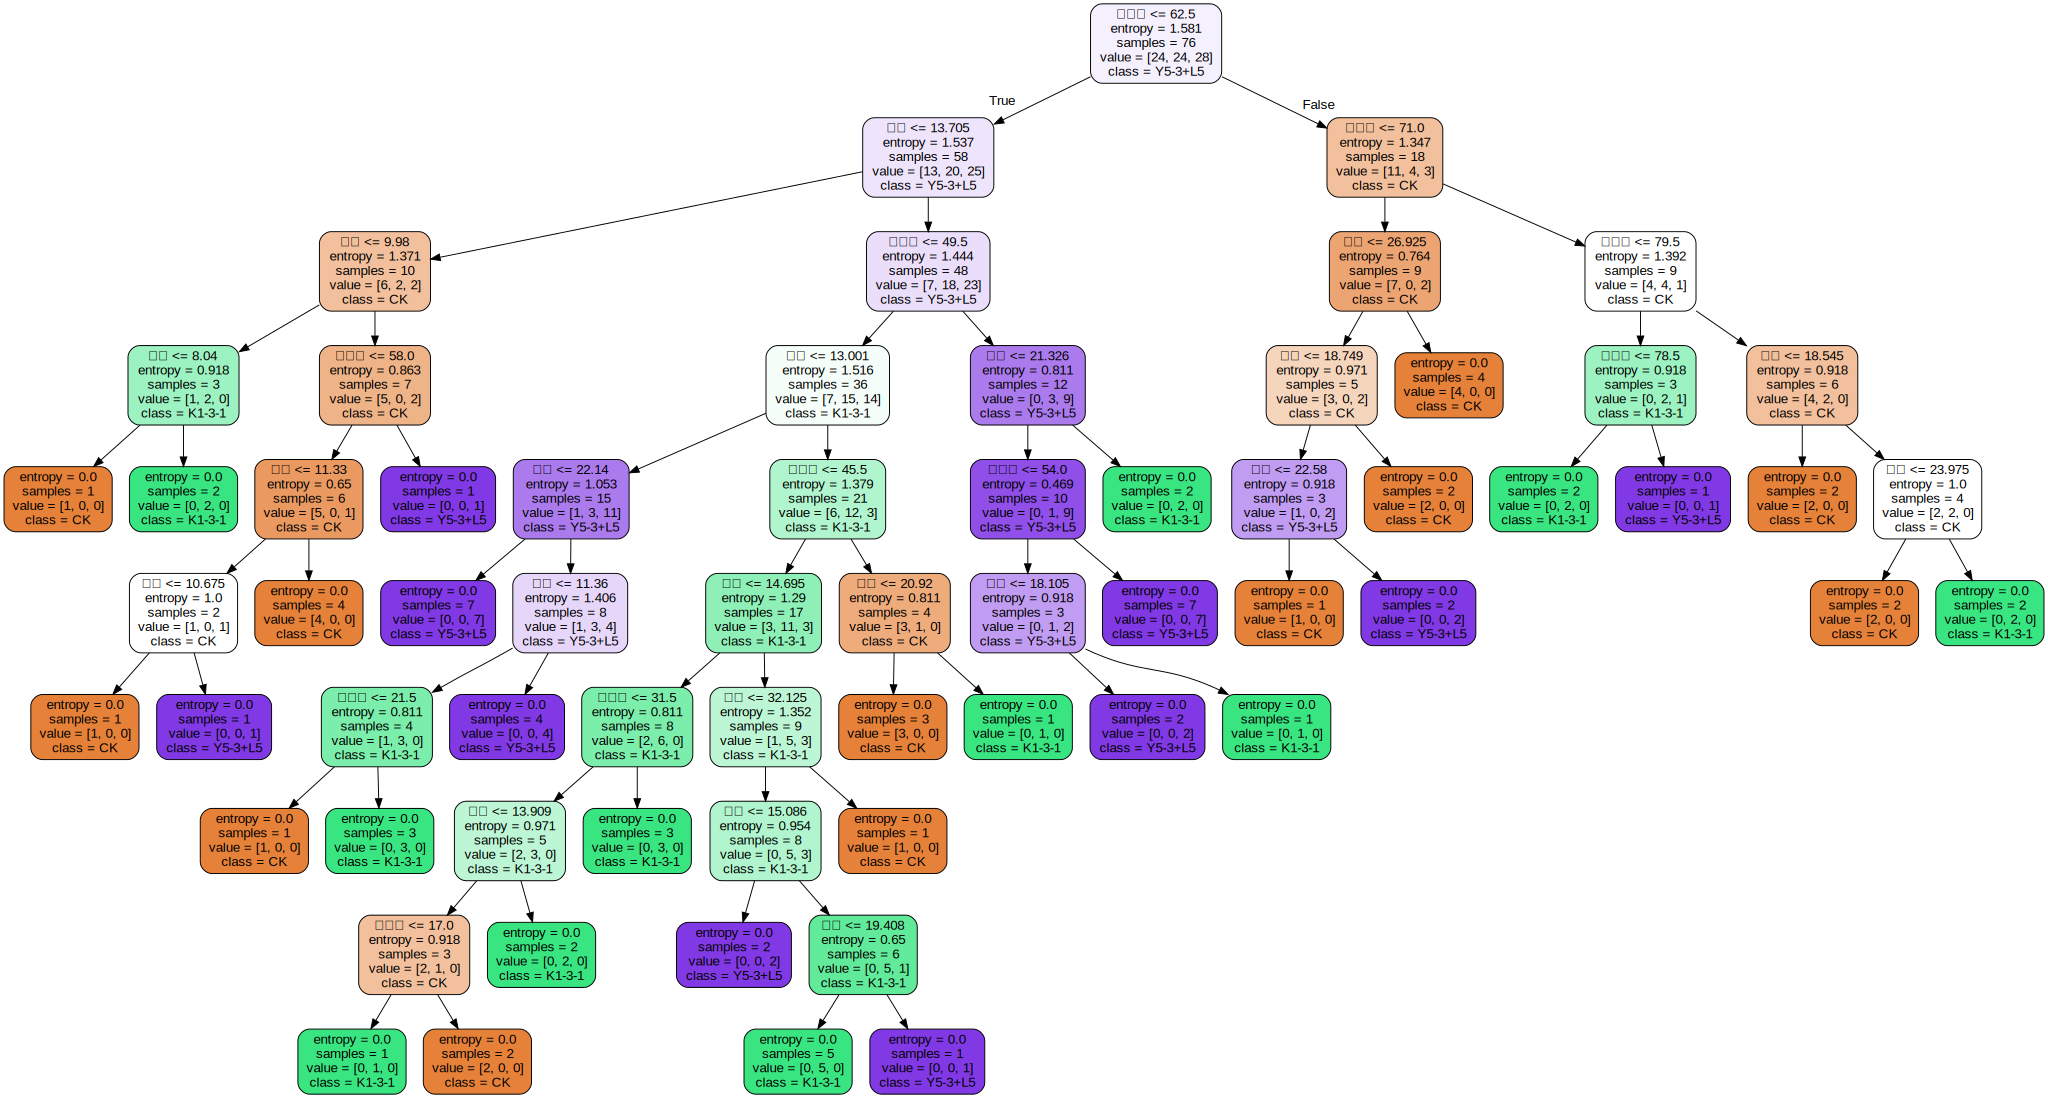

In [52]:
from sklearn.tree import export_graphviz
import graphviz
feature_names=['根冠','乾重','走莖數']
class_names=['CK','K1-3-1','Y5-3+L5']
dot_data=export_graphviz(decision_tree_clf,feature_names=feature_names,
                        class_names=class_names,
                        filled=True,rounded=True)
graph=graphviz.Source(dot_data)
graph